In [1]:
# setup, load dataset and imports
# reading image fails with opencv, using Pillow

import os
import pandas as pd
import numpy as np
from PIL import Image
import collections

import matplotlib.pyplot as plt

IMAGE = 'image'
EMOTION = 'emotion'
DATASET = '../facial_expressions/'
images_path = DATASET + 'images'
csv_path = DATASET + '/data/legend.csv'

legend = pd.read_csv(csv_path)
# print(legend[EMOTION].unique())
legend[EMOTION] = legend[EMOTION].str.upper()
print(legend[EMOTION].unique())
# convert classes to 7

# Create class map (unique class labels mapped to indices)
classes = legend[EMOTION].unique()
classMap = {i: class_name for i, class_name in enumerate(classes)}


# Add numeric labels to the dataframe
class_to_index = {class_name: i for i, class_name in enumerate(classes)}
legend['class_index'] = legend[EMOTION].map(class_to_index)


X = []
y = []

for _, row in legend.iterrows():
    image_file = row[IMAGE]
    class_index = row['class_index']
    
    img_path = os.path.join(images_path, image_file)
    
    with Image.open(img_path) as img:
        img_array = np.array(img)
        if(img_array.shape == (350,350)):
            X.append(img_array)
            y.append(class_index)
    
print(f'{len(X)} of 13690 images have shape (350,350). Using only them.')


# int or float?
X = np.array(X)
y = np.array(y)

print(f"ClassMap: {classMap}")


['ANGER' 'SURPRISE' 'DISGUST' 'FEAR' 'NEUTRAL' 'HAPPINESS' 'SADNESS'
 'CONTEMPT']
12765 of 13690 images have shape (350,350). Using only them.
ClassMap: {0: 'ANGER', 1: 'SURPRISE', 2: 'DISGUST', 3: 'FEAR', 4: 'NEUTRAL', 5: 'HAPPINESS', 6: 'SADNESS', 7: 'CONTEMPT'}


[[  9   9   9 ...  42  41  41]
 [  9   9   9 ...  41  41  41]
 [  8   8   9 ...  42  41  41]
 ...
 [160 160 161 ...  68  69  70]
 [159 159 160 ...  67  69  69]
 [159 159 160 ...  67  69  69]]


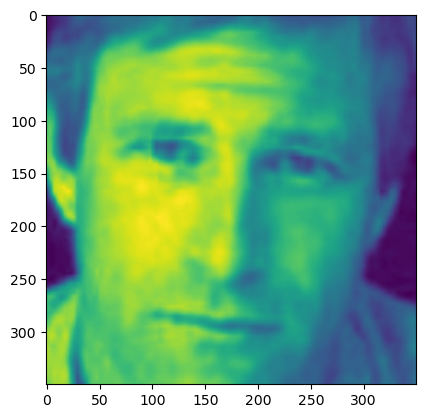

In [2]:
# display images for happiness

print(X[0])
plt.imshow(X[0])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [4]:
#Normalizing the data
X = X / 255.0 
#Flattening the images
X_flattened = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(
    X_flattened,  
    y,
    test_size=0.25,
    random_state=1234,
    stratify=y  # Preserve class proportions
)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 9573
Testing set size: 3192


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# k = 94
# knn = KNeighborsClassifier(n_neighbors=k)
# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"k-NN Accuracy (k={k}): {accuracy:.2f}") 

# param_grid = {'n_neighbors': range(101, 501,5)}
# grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print(f"Best k: {grid_search.best_params_['n_neighbors']}")
# print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

k_values = range(1, 101)  # Test k from 1 to 100
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  
    cv_scores.append(scores.mean())

# Find best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k: {best_k}")

python(8788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
